# <h1 style = "font-size: 40px;"><em>Final Project Title</em></h1>
### <u>By: Julian Spencer && Eric Bloom</u>
## Published: [Instert Date]<br>Last Updated: [Insert Date]
----------------------------------------------------------------------------------------
### <h2>Table of Contents</h2> 
<ol style="margin: 20px; font-size: 16px;">
    <li>Introduction</li>
    <li>Data Data Wrangling 
        <ol>
            <li>Meeting the Data</li>
            <li>Data Manipulation</li>
        </ol>
    <li>Data Exploration and Analysis</li>
    <li>Comparing student populations vs number of faculty</li>
    <li>A hypothetical scenario</li>
    <li>Bang for you buck!</li>
    <li>How does this affect ranking?</li>
    <li>UMD Computer Science Growth Rate</li>
    <li>What does UMD need to do to keep up?</li>
    <li>Conclusion</li>
</ol>



-----------------------------------------------------------------------

## <h2>1.) Introduction</h2>
<br>
<p style = "font-size: 16px;">The main goal of our data science final project is to investigate the correlation between home sales and different seasons. Specifically, we want to find out what type of amenities make a house more valuable during certain seasons. We will focus on three amenities: fireplaces, porches, and decks.To achieve our goal, we plan to use all the skills we aquired over the semester in working with python, pandas, matplotlib, and more to analyze a dataset of home sales data. We will look at the number of homes sold in different seasons and compare the number of homes with fireplaces, porches, and decks to the number of homes without these amenities. We will also look at the sale prices of homes with and without these amenities in different seasons.</p><p style = "font-size: 16px;">Our null hypothesis is that there is no correlation with houses being sold and the amentities. We will test this hypothesis using statistical analysis and machine learning techniques.</p><p style = "font-size: 16px;">Overall, we believe that our analysis will provide valuable insights into the correlation between home sales and seasons, and help us understand which amenities are most valuable in different seasons. We hope that our findings will be useful for homeowners and real estate agents looking to optimize the sale of their homes.</p> 

<br>

--------------------------------------------------------------------------

## <h2>2.) Data Wrangling</h2><br><h3>2.A.) Meeting the Data</h3>
<br>
<p style = "font-size: 16px;">The first step would be to read in the training data for the house pricing vs season model and get a glimpse of what kind of data manipulation must be done. To our amazement, the dataset contains 81 different columns, most of which have little predictive power and a low correlation with the target variable. In order to build an effective model, we will need to carefully identify and select the relevant columns. In section 2B, we will discuss our approach to this challenge and explain how it will help us improve the accuracy of our model.</p>

In [2]:
## All Imports
import folium
import requests
import csv
import pandas as pd

house_df = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## <h3>2.B.) Data Manipulation</h3>
<br>
<p style = "font-size: 16px;">We decided to gut a majority of the columns since they proved to be irrelavent for proving our null hypothesis or they ahd little predictive power. Here is why we got rid of some and what our thought process was when it came to dopping them:</p>
<ul style = "font-size: 16px;">
    <li>Add thoughts and reasons</li>
</ul>

In [3]:
#Edit months sold to calendar words not numbers (new column)
house_df = house_df.drop(columns = ["LandContour","Utilities","Street","Alley","LandSlope","MasVnrType","Condition2","Heating","Electrical","MasVnrArea","RoofMatl","BsmtFinSF2","BsmtCond","ExterCond","Foundation","GarageFinish","LowQualFinSF","Functional","YearBuilt","YearRemodAdd","ExterQual","MSSubClass","MSZoning","LotConfig","LotFrontage","LotArea","LotShape","MiscFeature","MiscVal","BldgType","HouseStyle","Neighborhood","Id","Condition1","OverallQual","OverallCond","RoofStyle","Exterior1st","Exterior2nd","BsmtQual","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","BsmtHalfBath","BsmtFullBath","BedroomAbvGr","KitchenAbvGr","KitchenQual","TotRmsAbvGrd","GarageYrBlt","GarageCars","FullBath","HalfBath","GarageCond","Fence","SaleType","SaleCondition","PavedDrive","GarageArea","GarageQual","PoolArea","PoolQC"])

In [4]:
house_df.rename(columns = {'3SsnPorch':'SeasonalPorch'}, inplace=True)
house_df.head()

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object

In [ ]:
house_df['MoSold'].replace(1,'Jan',inplace=True)
house_df['MoSold'].replace(2,'Feb',inplace=True)
house_df['MoSold'].replace(3,'Mar',inplace=True)
house_df['MoSold'].replace(4,'Apr',inplace=True)
house_df['MoSold'].replace(5,'May',inplace=True)
house_df['MoSold'].replace(6,'June',inplace=True)
house_df['MoSold'].replace(7,'July',inplace=True)
house_df['MoSold'].replace(8,'Aug',inplace=True)
house_df['MoSold'].replace(9,'Sept',inplace=True)
house_df['MoSold'].replace(10,'Oct',inplace=True)
house_df['MoSold'].replace(11,'Nov',inplace=True)
house_df['MoSold'].replace(12,'Dec',inplace=True)

In [ ]:
 months = { "Jan": 1,
         "Feb": 2,
         'Mar': 3,
         'Apr': 4,
         'May': 5,
         'June': 6,
         'July': 7,
         'Aug': 8,
         'Sept': 9,
         'Oct': 10,
         'Nov': 11,
         'Dec': 12,
    }

def month(series):
   
    
    return series.apply(lambda x: months.get(x, 1000))
    #return months[mo]
        
house_df.sort_values(by=['MoSold'], key = month, inplace=True)
house_df
house_df.count()

<p style = "font-size: 16px;">We decided to gut a majority of the columns since they proved to be irrelavent for proving our null hypothesis or they ahd little predictive power. Here is why we got rid of some and what our thought process was when it came to dopping them:</p>

--------------------------------------------------------------------------

## <h2>3.) Porch & Deck Correlations</h2><br><h3>3.A.) Linear Regression regarding Decks and Porches</h3>
<br>
<p style = "font-size: 16px;"></p>

Slope for Wood Deck Area vs House Price Regression: 149.854728
Slope for Open Porch Area vs House Price Regression: 106.935459


/home/ebloom14/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1254: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


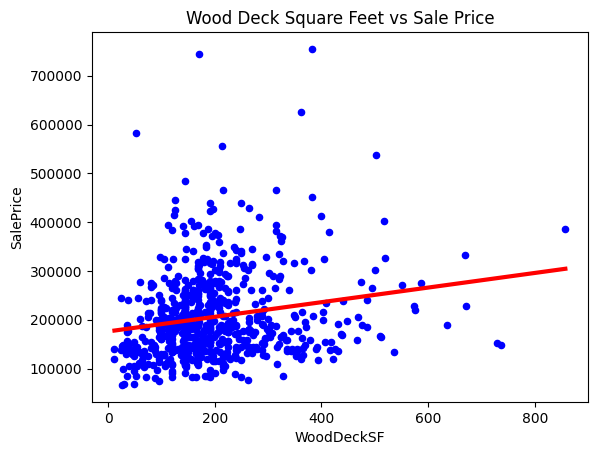

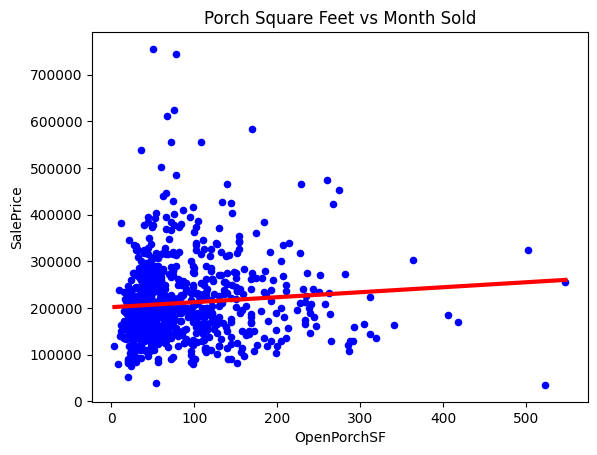

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

wood = house_df.query('WoodDeckSF != 0')
porch = house_df.query('OpenPorchSF != 0')

X_wood = wood['WoodDeckSF'].values.reshape(-1,1)
X_porch = porch['OpenPorchSF'].values.reshape(-1,1)
Y_w = wood['SalePrice'].values
Y_p = porch['SalePrice'].values

reg = LinearRegression()
reg2 = LinearRegression()

prediction_wood = np.linspace(min(X_wood), max(X_wood)).reshape(-1, 1)
prediction_porch = np.linspace(min(X_porch), max(X_porch)).reshape(-1, 1)

reg.fit(X_wood, Y_w)
reg2.fit(X_porch, Y_p)

wood_pred = reg.predict(prediction_wood)
porch_pred = reg2.predict(prediction_porch)
print('Slope for Wood Deck Area vs House Price Regression: %f'%reg.coef_[0])
print('Slope for Open Porch Area vs House Price Regression: %f'%reg2.coef_[0])

wood.plot.scatter('WoodDeckSF','SalePrice', c= 'b')
plt.plot(prediction_wood, wood_pred, color='red', linewidth=3)
plt.title("Wood Deck Square Feet vs Sale Price")
plt.xlabel('Wood Deck Area in Square Feet')
plt.ylabel('House Sale Price')
porch.plot.scatter('OpenPorchSF','SalePrice', c= 'b')
plt.plot(prediction_porch, porch_pred, color='red', linewidth=3)
plt.title("Porch Square Feet vs Month Sold")
plt.xlabel("Open porch Area in Square Feet")
plt.show()

## <h3>3.B.) Comparing Types of Porches with Month Sold</h3>
<br>
<p style = "font-size: 16px;"></p>

<AxesSubplot: xlabel='MoSold', ylabel='3SsnPorch'>

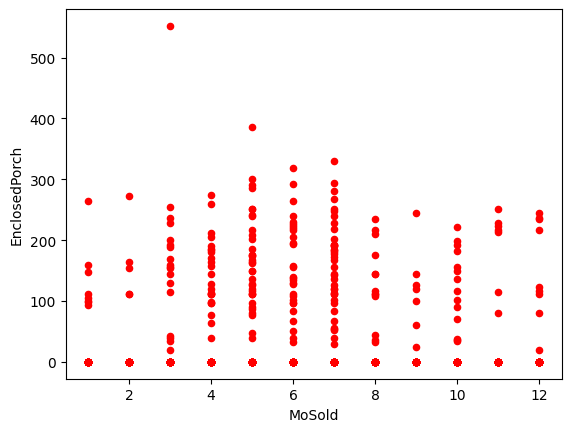

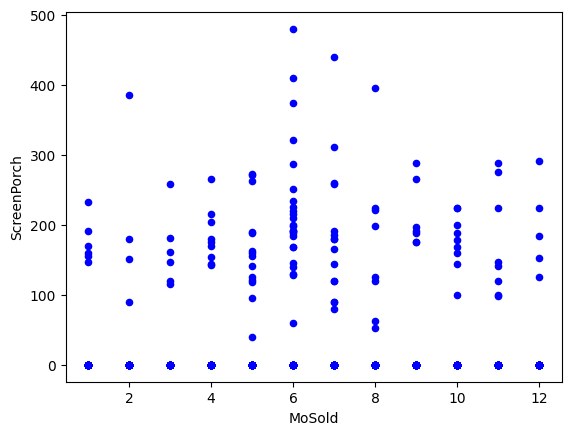

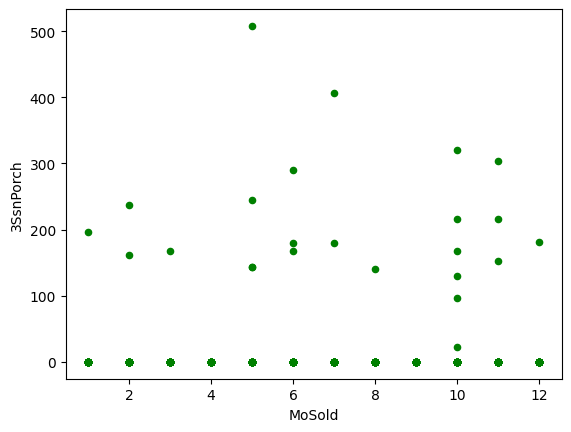

In [6]:
house_df.plot.scatter('MoSold','EnclosedPorch', c= 'r')
house_df.plot.scatter('MoSold','ScreenPorch', c= 'b')
house_df.plot.scatter('MoSold','3SsnPorch', c= 'g')

<p style = "font-size: 16px;">From these scatter plots we can notice that the distribution for open porch square area vs sales price is similar to the distribution for wooden deck square area vs sales price. We can also notice that on average Wooden Decks have more square area than an open porch. However this does not seem to affect the slope of the regression line, as we see that houses with an open porch increase in price faster than wooden decks.</p>

--------------------------------------------------------------------------

## <h2>4.) Porch Type Distributions</h2><br><h3>4.A.) Enclosed Porche Area VS Month Sold</h3>
<br>
<p style = "font-size: 16px;"></p>

## <h3>4.B.) Screened Porch Area VS Month Sold</h3>
<br>
<p style = "font-size: 16px;"></p>

## <h3>4.C.) 3-Season Porch Area VS Month Sold</h3>
<br>
<p style = "font-size: 16px;"></p>

--------------------------------------------------------------------------

## <h2>4.) FirePlace Correlation Data</h2><br><h3>4.A.) Number of Fireplaces Sold VS Month Sold</h3>
<br>
<p style = "font-size: 16px;"></p>

<AxesSubplot: xlabel='MoSold'>

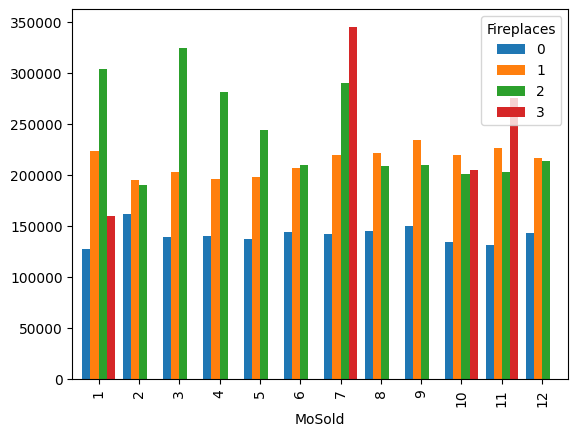

In [36]:
## We want to compare the fireplaces column which has values 1 or 2. Job for groupby
# Group the data by the 'Fireplace' column and the 'MoSold' column
grouped_data = house_df.groupby(['Fireplaces', 'MoSold'])

# Calculate the mean sales price for each group
mean_sales_price = grouped_data['SalePrice'].mean()

# Unstack the grouped data to create a DataFrame with one column per 'Fireplace' value
unstacked_data = mean_sales_price.unstack(level=0)


xticklabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Plot the resulting DataFrame using a bar chart with thicker bars and the specified x-axis tick labels
unstacked_data.plot(kind='bar', width=0.8)

## <h3>4.B.) Fireplace Qualiy VS Price of House Sold</h3>
<br>
<p style = "font-size: 16px;">We originally considered dropping the 'FireplaceQu' column due to a high percentage of NAN values, but decided to analyze the non-NAN values in relation to home sale prices.</p>

In [ ]:
## W